In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os
import json
import pickle
from replay_buffer.mpber import MultiAgentPrioritizedBlockReplayBuffer
from ray.rllib.utils.replay_buffers.multi_agent_prioritized_replay_buffer import MultiAgentPrioritizedReplayBuffer

/home/seventheli/conda/envs/hpc/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Set the theme for the plot
sns.set_theme(style="whitegrid")

# Create a color palette
palette = sns.color_palette("colorblind", 4)

# Create a dictionary that maps each unique value to a color
palette_dict = dict(zip([1, 8, 16, 32], palette))

In [4]:
experiments = {
    'Alien': {},
    'Amidar': {},
    'Assault': {},
    'Asterix': {},
    'Asteroids': {},
    'Atlantis': {},
    'BankHeist': {},
    'BattleZone': {},
    'BeamRider': {},
    'Berzerk': {},
    'Bowling': {},
    'Boxing': {},
    'Breakout': {},
    'Carnival': {},
    'Centipede': {},
    'ChopperCommand': {},
    'CrazyClimber': {},
    'Defender': {},
    'FishingDerby': {},
    'Freeway': {},
    'Frostbite': {},
    'Gopher': {},
    'Qbert': {},
    'SpaceInvaders': {}
}
configs = {
    'Alien': {},
    'Amidar': {},
    'Assault': {},
    'Asterix': {},
    'Asteroids': {},
    'Atlantis': {},
    'BankHeist': {},
    'BattleZone': {},
    'BeamRider': {},
    'Berzerk': {},
    'Bowling': {},
    'Boxing': {},
    'Breakout': {},
    'Carnival': {},
    'Centipede': {},
    'ChopperCommand': {},
    'CrazyClimber': {},
    'Defender': {},
    'FishingDerby': {},
    'Freeway': {},
    'Frostbite': {},
    'Gopher': {},
    'Qbert': {},
    'SpaceInvaders': {}
}

In [5]:
selected = {
    'Alien': [],
    'Amidar': [],
    'Assault': [],
    'Asterix': [],
    'Asteroids': [],
    'Atlantis': [],
    'BankHeist': [],
    'BattleZone': [],
    'BeamRider': ['APEX_DDQN_BeamRiderNoFrameskip-v4_DPBER_514031',
                  'APEX_DDQN_BeamRiderNoFrameskip-v4_DPBER_512740',
                  'APEX_DDQN_BeamRiderNoFrameskip-v4_DPBER_514027',
                  'APEX_DDQN_BeamRiderNoFrameskip-v4_DPER_512749'],
    'Berzerk': [],
    'Bowling': [],
    'Boxing': [],
    'Breakout': ['APEX_DDQN_BreakoutNoFrameskip-v4_DPBER_514029',
                 'APEX_DDQN_BreakoutNoFrameskip-v4_DPBER_512738',
                 'APEX_DDQN_BreakoutNoFrameskip-v4_DPER_512746',
                 'APEX_DDQN_BreakoutNoFrameskip-v4_DPBER_514026'],
    'Carnival': [],
    'Centipede': ['APEX_DDQN_CentipedeNoFrameskip-v4_DPER_516176',],
    'ChopperCommand': ['APEX_DDQN_ChopperCommandNoFrameskip-v4_DPER_516177'],
    'CrazyClimber': ['APEX_DDQN_CrazyClimberNoFrameskip-v4_DPER_516178'],
    'Defender': ['APEX_DDQN_DefenderNoFrameskip-v4_DPER_516179'],
    'FishingDerby': [],
    'Freeway': [],
    'Frostbite': [],
    'Gopher': [],
    'Qbert': ['APEX_DDQN_QbertNoFrameskip-v4_DPBER_514028',
              'APEX_DDQN_QbertNoFrameskip-v4_DPER_512742',
              'APEX_DDQN_QbertNoFrameskip-v4_DPBER_512739',
              'APEX_DDQN_QbertNoFrameskip-v4_DPBER_514030'],
    'SpaceInvaders': ['APEX_DDQN_SpaceInvadersNoFrameskip-v4_DPER_512743',
                      'APEX_DDQN_SpaceInvadersNoFrameskip-v4_DPBER_514024',
                      'APEX_DDQN_SpaceInvadersNoFrameskip-v4_DPBER_514025']
}

In [6]:
for each in experiments.keys():
    path = os.path.join("/home/seventheli/JADE_loggings/", each)
    config = os.path.join("/home/seventheli/JADE_checkpoints/", each)
    for experiment in os.listdir(path):
        location = os.path.join(path, experiment)
        config_location = os.path.join(config, experiment)
        if experiment not in selected[each]:
            continue
        else:
            experiments[each][experiment] = []
            for file in os.listdir(location):
                try:
                    with open(os.path.join(location, file), "r") as f:
                        experiments[each][experiment].append(json.load(f))
                except:
                    print(file)
            with open(os.path.join(config_location, experiment + "_config.pyl"), "rb") as f:
                configs[each][experiment] = pickle.load(f)

4740.json


In [23]:
selected

{'Alien': [],
 'Amidar': [],
 'Assault': [],
 'Asterix': [],
 'Asteroids': [],
 'Atlantis': [],
 'BankHeist': [],
 'BattleZone': [],
 'BeamRider': [['APEX_DDQN_BeamRiderNoFrameskip-v4_DPBER_514031', 32],
  ['APEX_DDQN_BeamRiderNoFrameskip-v4_DPBER_512740', 8],
  ['APEX_DDQN_BeamRiderNoFrameskip-v4_DPBER_514027', 16],
  ['APEX_DDQN_BeamRiderNoFrameskip-v4_DPER_512749', 1]],
 'Berzerk': [],
 'Bowling': [],
 'Boxing': [],
 'Breakout': [['APEX_DDQN_BreakoutNoFrameskip-v4_DPBER_514029', 16],
  ['APEX_DDQN_BreakoutNoFrameskip-v4_DPBER_512738', 8],
  ['APEX_DDQN_BreakoutNoFrameskip-v4_DPER_512746', 1],
  ['APEX_DDQN_BreakoutNoFrameskip-v4_DPBER_514026', 32]],
 'Carnival': [],
 'Centipede': [['APEX_DDQN_CentipedeNoFrameskip-v4_DPER_516176', 1]],
 'ChopperCommand': [['APEX_DDQN_ChopperCommandNoFrameskip-v4_DPER_516177', 1]],
 'CrazyClimber': [['APEX_DDQN_CrazyClimberNoFrameskip-v4_DPER_516178', 1]],
 'Defender': [['APEX_DDQN_DefenderNoFrameskip-v4_DPER_516179', 1]],
 'FishingDerby': [],
 'Freew

In [7]:
for games in selected.keys():
    _ = []
    for i in selected[games]:
        try:
            _config = configs[games][i]
            if _config["replay_buffer_config"]["type"] == MultiAgentPrioritizedBlockReplayBuffer and i[0:4] == "APEX":
                _.append([i, _config["replay_buffer_config"]["sub_buffer_size"]])
            elif _config["replay_buffer_config"]["type"] == MultiAgentPrioritizedReplayBuffer and i[0:4] == "APEX":
                _.append([i, 1])
        except:
            pass
    selected[games] = _

In [17]:
sampler = {}
tags = ["episode_reward_max", "episode_reward_min", "episode_reward_mean", "episodes_this_iter"]

for each in selected.keys():
    selected_experiments = []
    for select in selected[each]:
        steps = []
        for info in experiments[each][select[0]]:
            _info = {
                **{i: info["sampler_results"][i] for i in tags},
                **info["counters"],
                **info["timers"],
                **{
                    "episodes_total": info["episodes_total"],
                    "training_iteration": info["training_iteration"],
                    "time_this_iter_s": info["time_this_iter_s"],
                    "time_total_s": info["time_total_s"],
                    "gpu_usage": info["perf"]["gpu_util_percent0"]
                }
            }
            steps.append(_info)
        steps = pd.DataFrame(steps).sort_values("time_total_s")
        steps["size"] = select[1]
        selected_experiments.append(steps.copy())
    try:
        sampler[each] = pd.concat(selected_experiments)
    except:
        pass

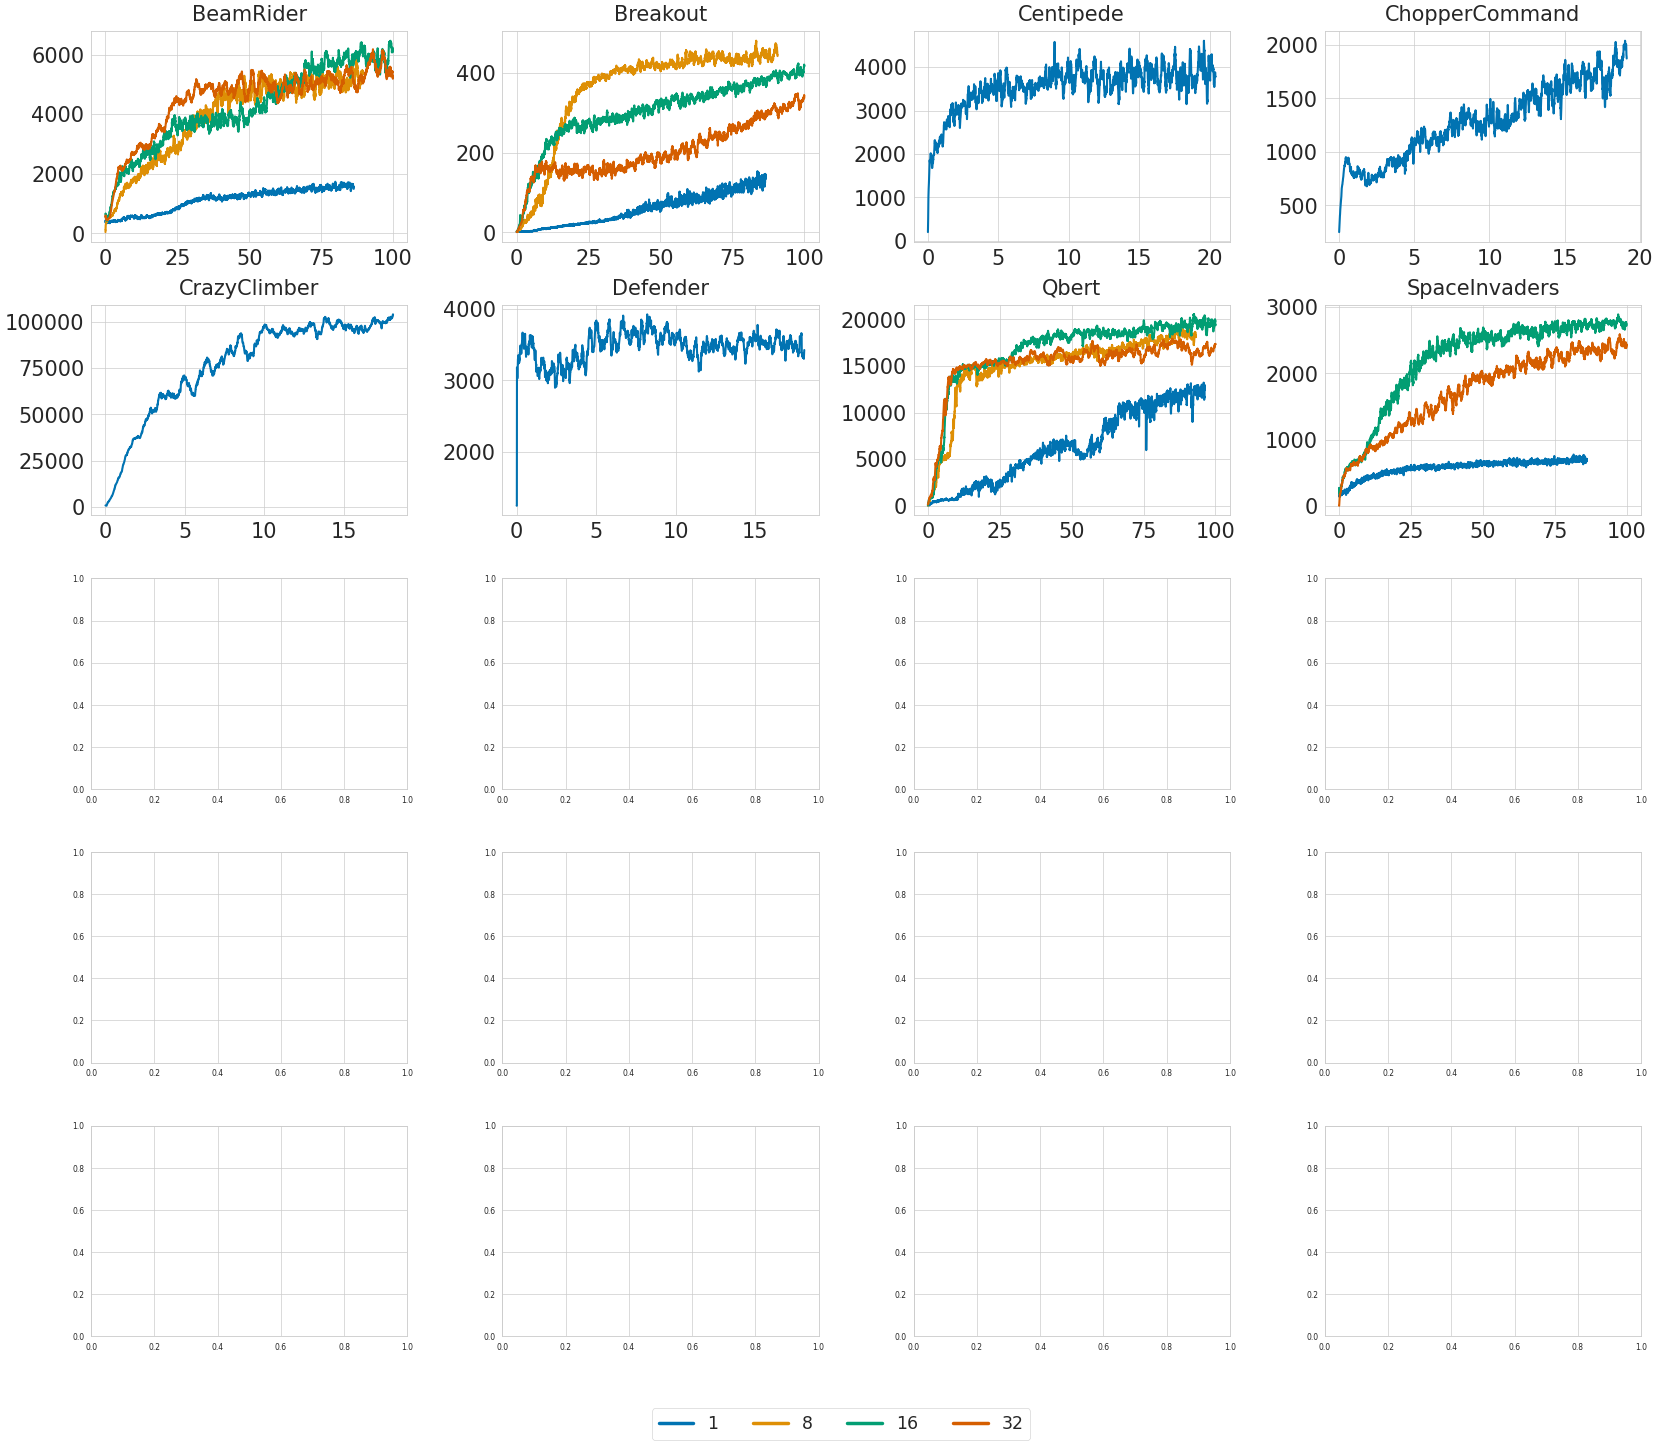

In [18]:
fig, axes = plt.subplots(5, 4, figsize=(40, 45), dpi=50)
axes = axes.reshape(-1)
lines_labels = []
labels = {}
key_map = {}
for ax_n, (experiment, data) in enumerate(sampler.items()):
    _data = data.copy()[["training_iteration", "num_env_steps_sampled", "num_env_steps_trained",
                         "time_total_s", "episode_reward_max", "episode_reward_min",
                         "episode_reward_mean", "size"]]
    _data.columns = ["training iteration", "sampled frame", "trained frame", "time(s)",
                     "episode reward(max)", "episode reward(min)", "episode reward(mean)",
                     "size"]
    _data["sampled frame"] = _data["sampled frame"] * 4
    _data["trained frame"] = _data["trained frame"] * 4
    _data["time(h)"] = _data["time(s)"] / 3600
    key_map[experiment] = ax_n
    ax = sns.lineplot(x="time(h)", y="episode reward(mean)", hue="size",
                      data=_data.reset_index(drop=True), linewidth=3, ax=axes[ax_n], palette=palette_dict)
    ax.set_title(experiment, fontsize=30, y=1.03)
    ax.xaxis.set_tick_params(labelsize=30)
    ax.xaxis.offsetText.set_fontsize(30)
    ax.yaxis.set_tick_params(labelsize=30)
    ax.yaxis.offsetText.set_fontsize(30)
    ax.set_ylabel(None)
    if ax_n != key_map.get("Qbert"):
        ax.get_legend().remove()
    else:
        lines_labels.extend(ax.get_legend_handles_labels() for ax in fig.axes)
        ax.get_legend().remove()
    # Show x-axis label only if it's on the bottom row
    if ax_n // 4 == 4:  # Check if it's in the last row
        ax.set_xlabel("time(h)", fontsize=30, labelpad=20)
    else:
        ax.set_xlabel(None)

for j in lines_labels:
    for i in zip(*j):
        labels[i[1]] = i[0]
labels, lines = [i[0] for i in list(labels.items())], [i[1] for i in list(labels.items())]
for i in lines:
    i.set_linewidth(5.0)

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.3)  # Increase bottom space to fit the legend
handles, labels = axes[key_map.get("Qbert")].get_legend_handles_labels()

# Move the figure-level legend closer to the main figure by adjusting the bbox_to_anchor parameter
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, 0.25), ncol=6, fontsize=25)

plt.show()

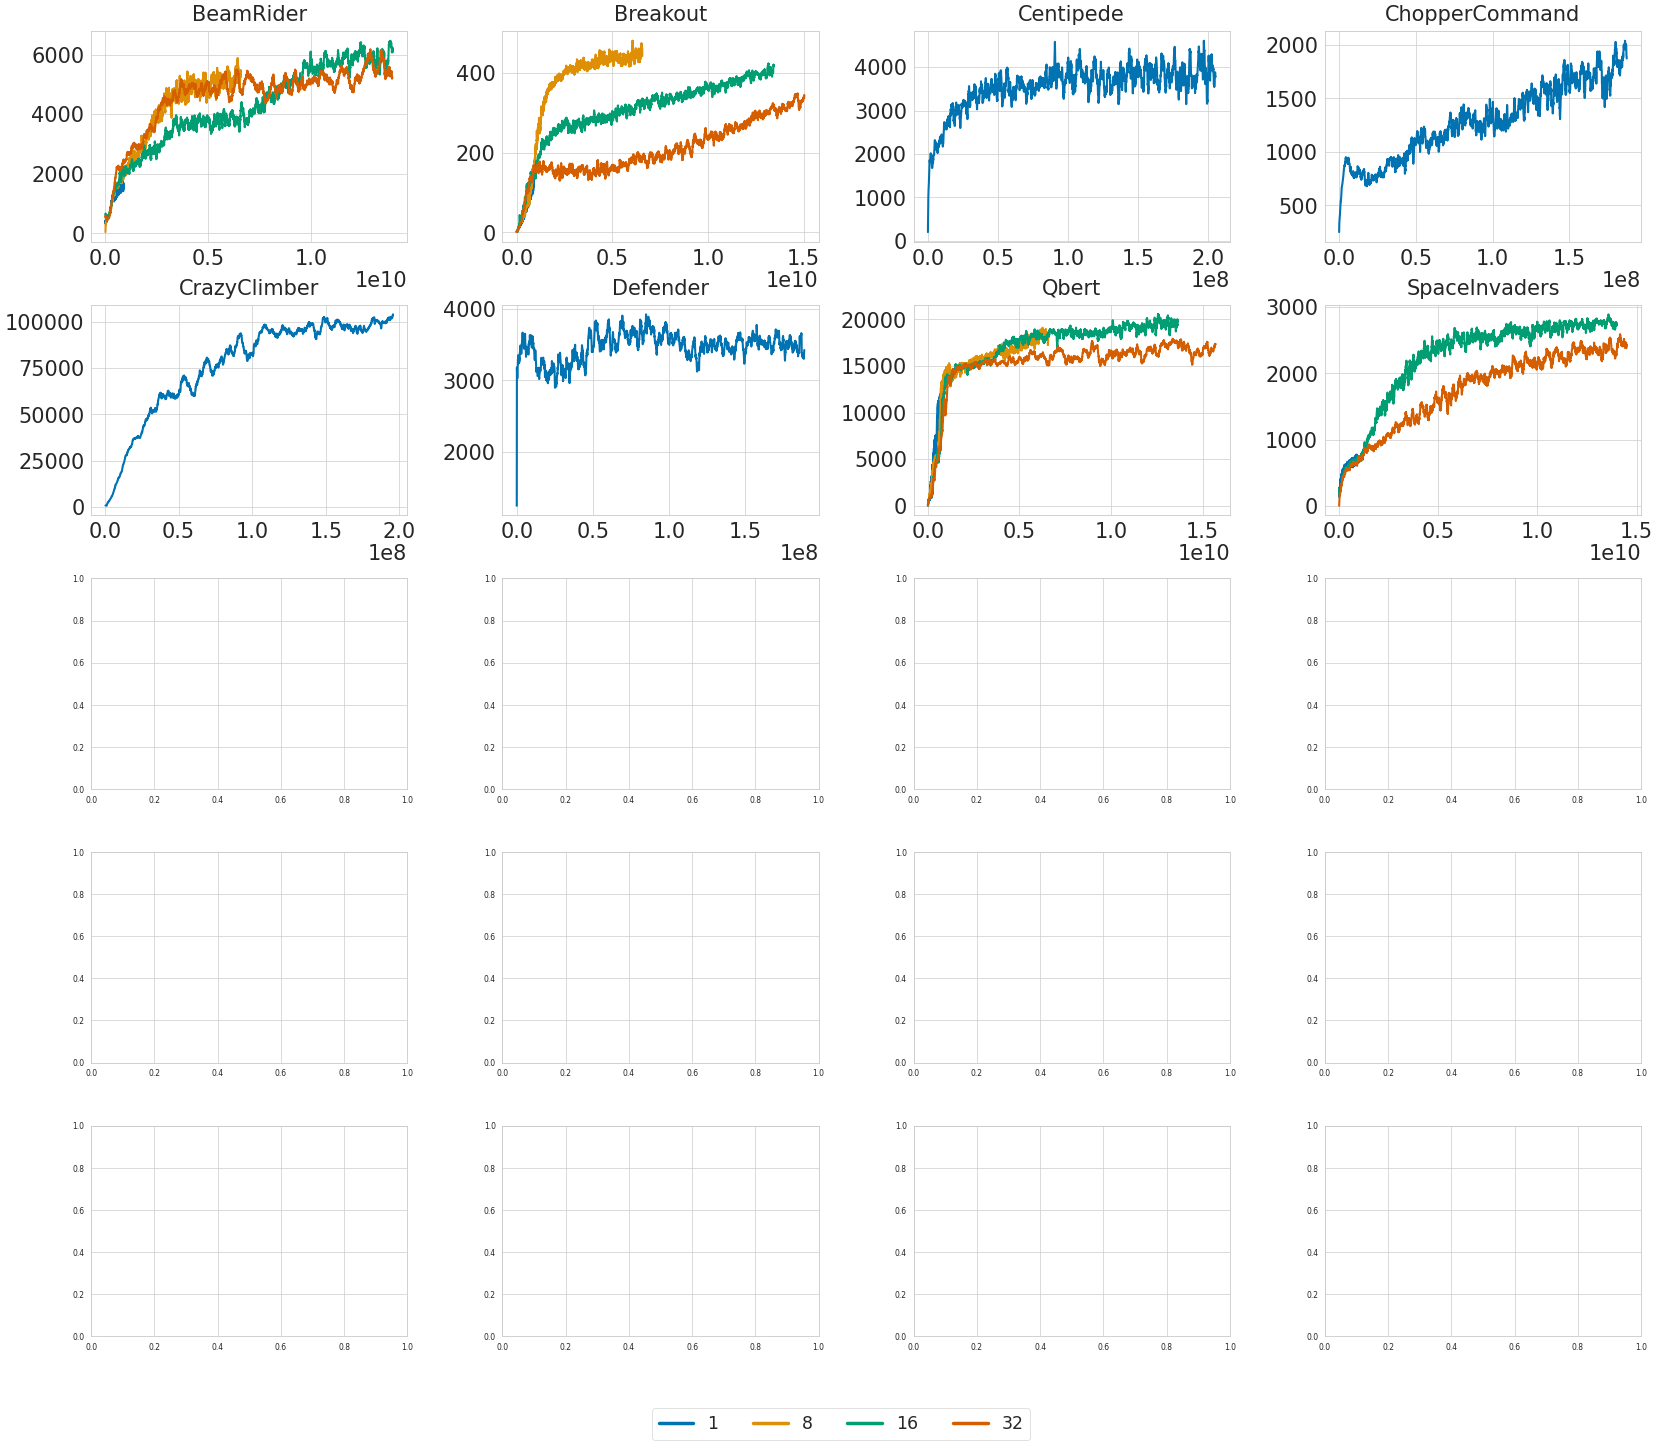

In [19]:
fig, axes = plt.subplots(5, 4, figsize=(40, 45), dpi=50)
axes = axes.reshape(-1)
lines_labels = []
labels = {}
key_map = {}
for ax_n, (experiment, data) in enumerate(sampler.items()):
    _data = data.copy()[["training_iteration", "num_env_steps_sampled", "num_env_steps_trained",
                         "time_total_s", "episode_reward_max", "episode_reward_min",
                         "episode_reward_mean", "size"]]
    _data.columns = ["training iteration", "sampled frame", "trained frame", "time(s)",
                     "episode reward(max)", "episode reward(min)", "episode reward(mean)",
                     "size"]
    _data["sampled frame"] = _data["sampled frame"] * 4
    _data["trained frame"] = _data["trained frame"] * 4
    _data["time(h)"] = _data["time(s)"] / 3600
    key_map[experiment] = ax_n
    ax = sns.lineplot(x="trained frame", y="episode reward(mean)", hue="size",
                      data=_data.reset_index(drop=True), linewidth=3, ax=axes[ax_n], palette=palette_dict)
    ax.set_title(experiment, fontsize=30, y=1.03)
    ax.xaxis.set_tick_params(labelsize=30)
    ax.xaxis.offsetText.set_fontsize(30)
    ax.yaxis.set_tick_params(labelsize=30)
    ax.yaxis.offsetText.set_fontsize(30)
    ax.set_ylabel(None)
    if ax_n != key_map.get("Qbert"):
        ax.get_legend().remove()
    else:
        lines_labels.extend(ax.get_legend_handles_labels() for ax in fig.axes)
        ax.get_legend().remove()
    # Show x-axis label only if it's on the bottom row
    if ax_n // 4 == 4:  # Check if it's in the last row
        ax.set_xlabel("time(h)", fontsize=30, labelpad=20)
    else:
        ax.set_xlabel(None)

for j in lines_labels:
    for i in zip(*j):
        labels[i[1]] = i[0]
labels, lines = [i[0] for i in list(labels.items())], [i[1] for i in list(labels.items())]
for i in lines:
    i.set_linewidth(5.0)

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.3)  # Increase bottom space to fit the legend
handles, labels = axes[key_map.get("Qbert")].get_legend_handles_labels()

# Move the figure-level legend closer to the main figure by adjusting the bbox_to_anchor parameter
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, 0.25), ncol=6, fontsize=25)

plt.show()

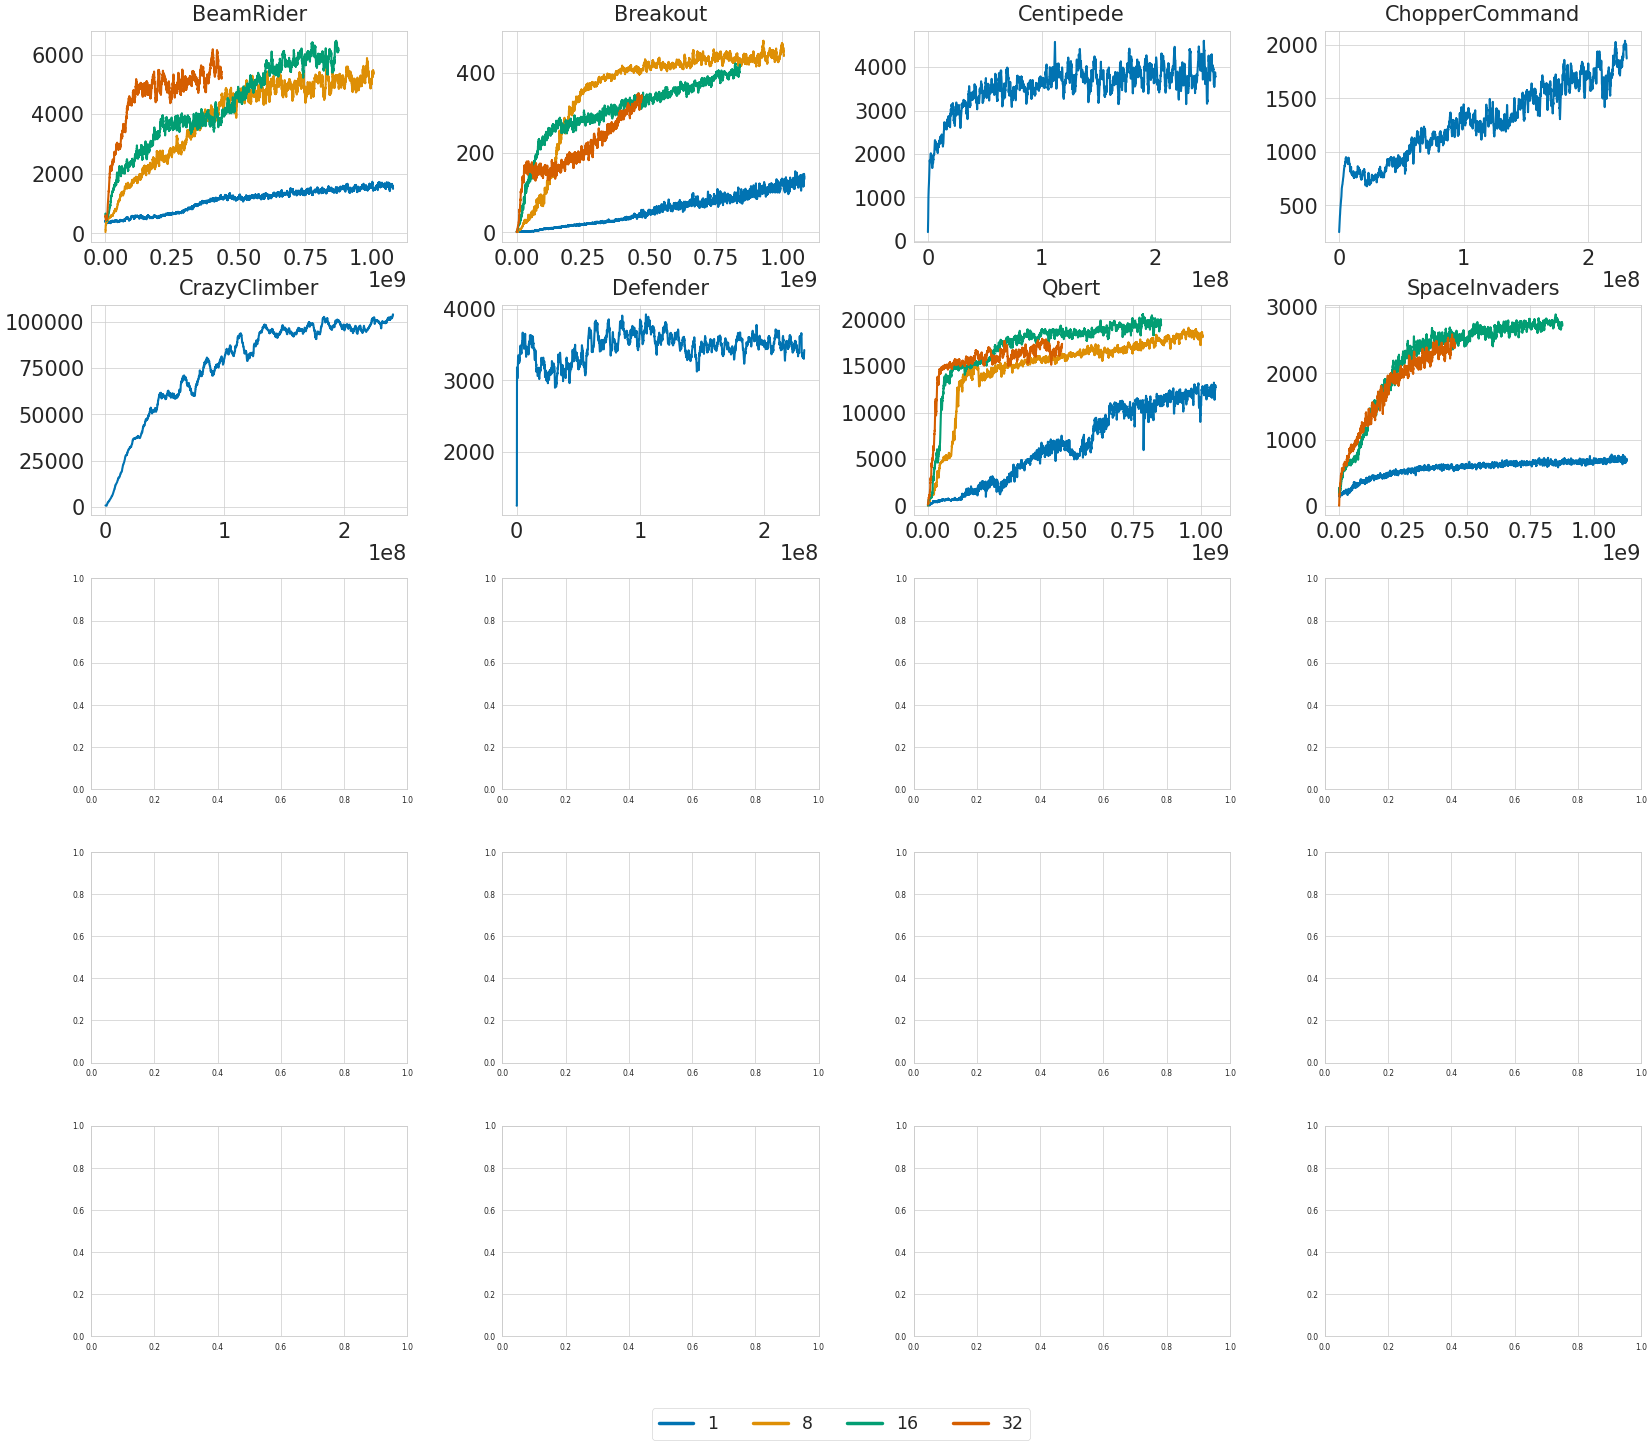

In [20]:
fig, axes = plt.subplots(5, 4, figsize=(40, 45), dpi=50)
axes = axes.reshape(-1)
lines_labels = []
labels = {}
key_map = {}
for ax_n, (experiment, data) in enumerate(sampler.items()):
    _data = data.copy()[["training_iteration", "num_env_steps_sampled", "num_env_steps_trained",
                         "time_total_s", "episode_reward_max", "episode_reward_min",
                         "episode_reward_mean", "size"]]
    _data.columns = ["training iteration", "sampled frame", "trained frame", "time(s)",
                     "episode reward(max)", "episode reward(min)", "episode reward(mean)",
                     "size"]
    _data["sampled frame"] = _data["sampled frame"] * 4
    _data["trained frame"] = _data["trained frame"] * 4
    _data["time(h)"] = _data["time(s)"] / 3600
    key_map[experiment] = ax_n
    ax = sns.lineplot(x="sampled frame", y="episode reward(mean)", hue="size",
                      data=_data.reset_index(drop=True), linewidth=3, ax=axes[ax_n], palette=palette_dict)
    ax.set_title(experiment, fontsize=30, y=1.03)
    ax.xaxis.set_tick_params(labelsize=30)
    ax.xaxis.offsetText.set_fontsize(30)
    ax.yaxis.set_tick_params(labelsize=30)
    ax.yaxis.offsetText.set_fontsize(30)
    ax.set_ylabel(None)
    if ax_n != key_map.get("Qbert"):
        ax.get_legend().remove()
    else:
        lines_labels.extend(ax.get_legend_handles_labels() for ax in fig.axes)
        ax.get_legend().remove()
    # Show x-axis label only if it's on the bottom row
    if ax_n // 4 == 4:  # Check if it's in the last row
        ax.set_xlabel("time(h)", fontsize=30, labelpad=20)
    else:
        ax.set_xlabel(None)

for j in lines_labels:
    for i in zip(*j):
        labels[i[1]] = i[0]
labels, lines = [i[0] for i in list(labels.items())], [i[1] for i in list(labels.items())]
for i in lines:
    i.set_linewidth(5.0)

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.3)  # Increase bottom space to fit the legend
handles, labels = axes[key_map.get("Qbert")].get_legend_handles_labels()

# Move the figure-level legend closer to the main figure by adjusting the bbox_to_anchor parameter
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, 0.25), ncol=6, fontsize=25)

plt.show()

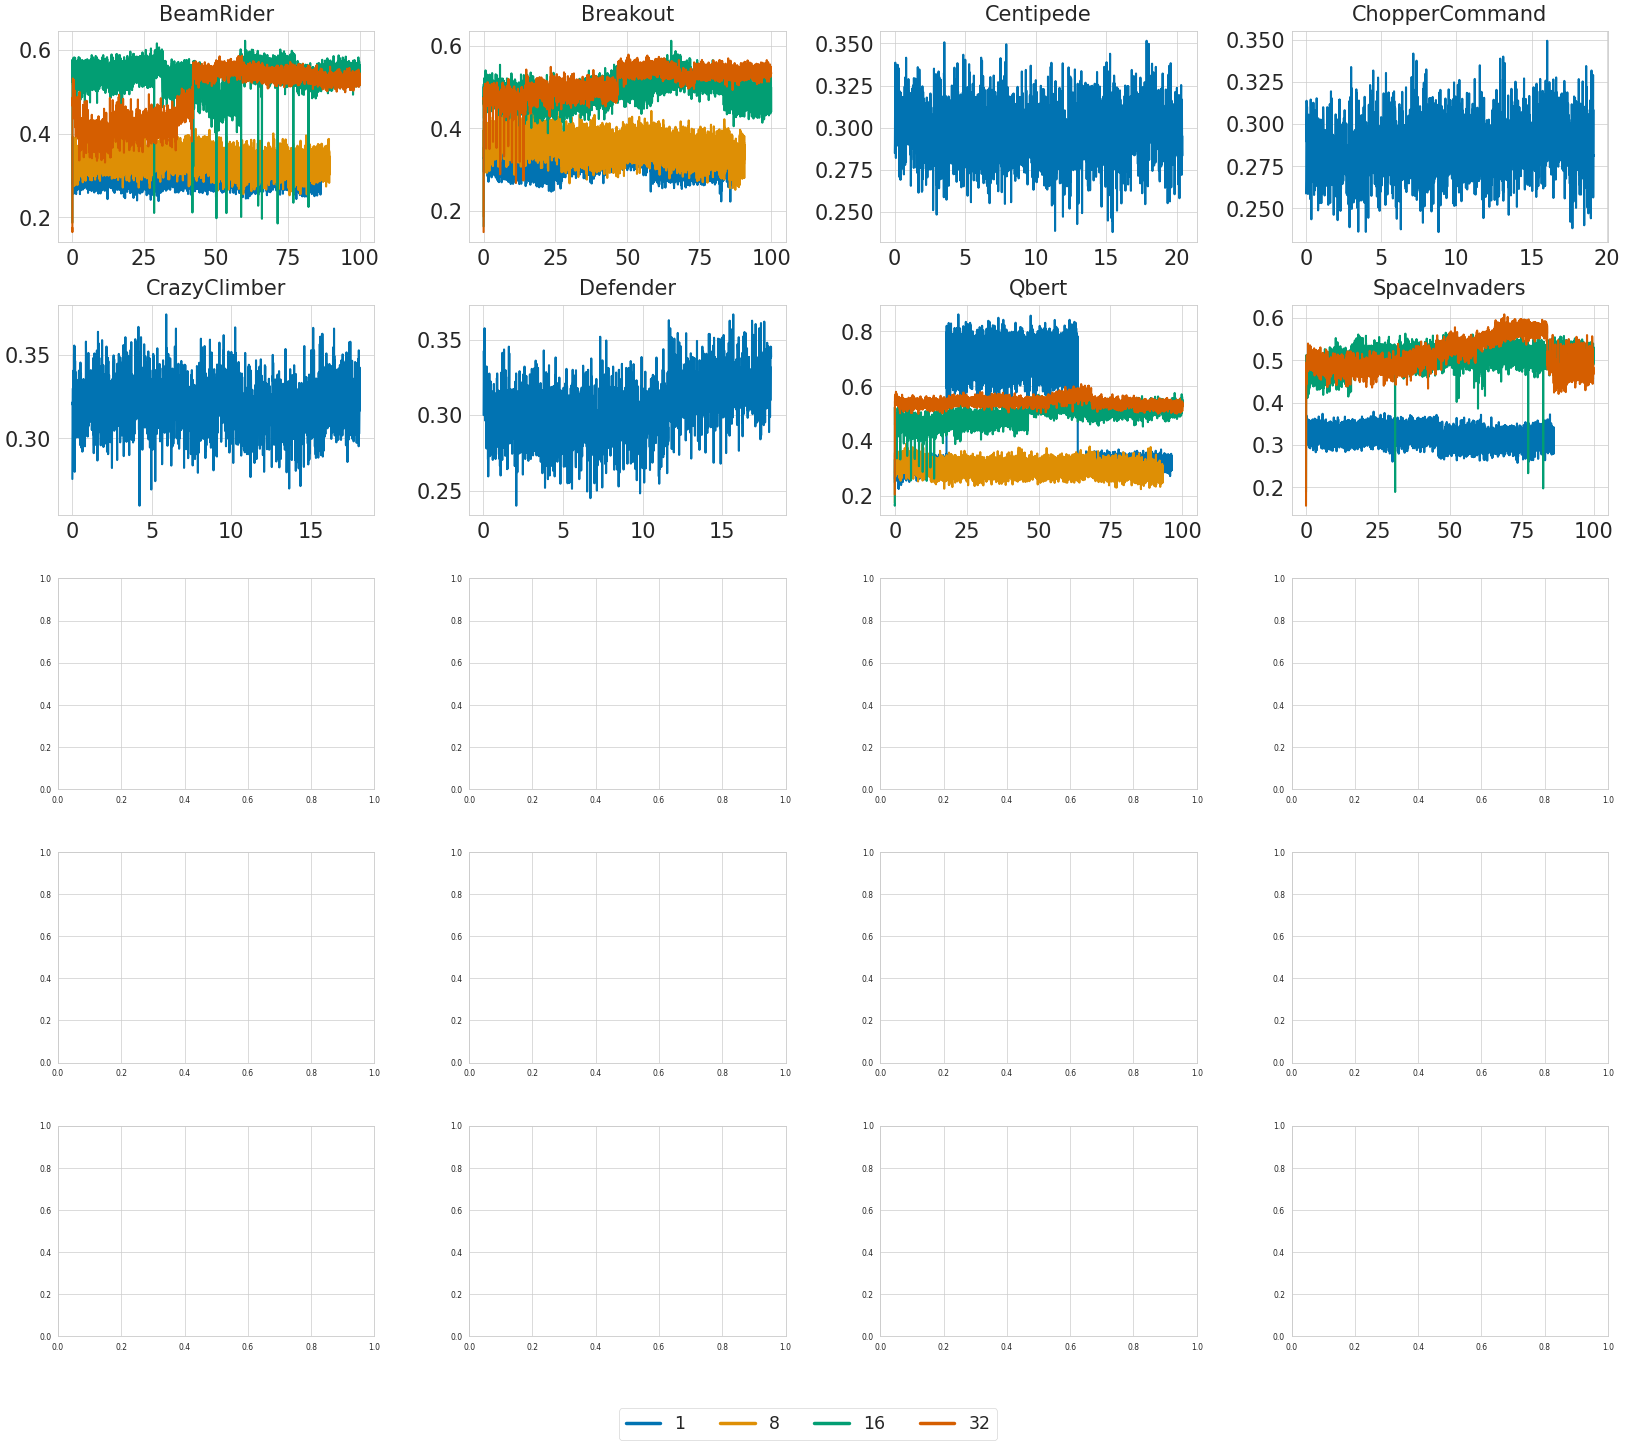

In [21]:
fig, axes = plt.subplots(5, 4, figsize=(40, 45), dpi=50)
axes = axes.reshape(-1)
lines_labels = []
labels = {}
key_map = {}
for ax_n, (experiment, data) in enumerate(sampler.items()):
    _data = data.copy()[["training_iteration", "gpu_usage",
                         "time_total_s", "episode_reward_max", "episode_reward_min",
                         "episode_reward_mean", "size"]]
    _data.columns = ["training iteration", "gpu usage", "time(s)",
                     "episode reward(max)", "episode reward(min)", "episode reward(mean)",
                     "size"]
    _data["time(h)"] = _data["time(s)"] / 3600
    key_map[experiment] = ax_n
    ax = sns.lineplot(x="time(h)", y="gpu usage", hue="size",
                      data=_data.reset_index(drop=True), linewidth=3, ax=axes[ax_n], palette=palette_dict)
    ax.set_title(experiment, fontsize=30, y=1.03)
    ax.xaxis.set_tick_params(labelsize=30)
    ax.xaxis.offsetText.set_fontsize(30)
    ax.yaxis.set_tick_params(labelsize=30)
    ax.yaxis.offsetText.set_fontsize(30)
    ax.set_ylabel(None)
    if ax_n != key_map.get("Qbert"):
        ax.get_legend().remove()
    else:
        lines_labels.extend(ax.get_legend_handles_labels() for ax in fig.axes)
        ax.get_legend().remove()
    # Show x-axis label only if it's on the bottom row
    if ax_n // 4 == 4:  # Check if it's in the last row
        ax.set_xlabel("time(h)", fontsize=30, labelpad=20)
    else:
        ax.set_xlabel(None)

for j in lines_labels:
    for i in zip(*j):
        labels[i[1]] = i[0]
labels, lines = [i[0] for i in list(labels.items())], [i[1] for i in list(labels.items())]
for i in lines:
    i.set_linewidth(5.0)

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.3)  # Increase bottom space to fit the legend
handles, labels = axes[key_map.get("Qbert")].get_legend_handles_labels()

# Move the figure-level legend closer to the main figure by adjusting the bbox_to_anchor parameter
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, 0.25), ncol=6, fontsize=25)

plt.show()